# Loading Data 
loading data and changing time format

In [3]:
import numpy as np
import pandas as pd
import requests
from io import BytesIO
from datetime import datetime
from pathlib import Path

In [4]:
update_data = False
data_path = Path("data.txt")
if data_path.is_file() and not update_data:
    with open(data_path, "rb") as f:
        data = f.read()
else:

    url = "http://195.248.242.134:8000/candlesticks/candle"
    params = {
        "symbol":"EURUSD"
    }
    request = requests.get(url,params=params, timeout=100)
    if request.status_code == 200:
        data = request.content
    else:
        raise RuntimeError("failed to get data")
    with open(data_path,"wb") as f:
        f.write(data)



In [ ]:
data
# df = pd.read_json(BytesIO(data))

In [2]:
# df["time"] = df["time"].apply( lambda x: datetime.fromtimestamp(x))
df["time"] = pd.to_datetime(df["time"])

KeyError: 'time'

In [5]:
df.head()

,time,open,high,low,close,timeframe
0,2022-08-18 23:14:00,1.01223,1.01224,1.01194,1.01198,M2
1,2022-08-18 23:16:00,1.01199,1.01214,1.01187,1.01207,M2
2,2022-08-18 23:18:00,1.01207,1.01208,1.01165,1.01175,M2
3,2022-08-18 23:20:00,1.01176,1.01176,1.01141,1.01157,M2
4,2022-08-18 23:22:00,1.01157,1.01190,1.01156,1.01189,M2


In [6]:
df.tail()

,time,open,high,low,close,timeframe
81698,2023-01-19 21:34:00,1.07916,1.07919,1.07873,1.07883,M2
81699,2023-01-19 21:36:00,1.07884,1.07922,1.07884,1.07919,M2
81700,2023-01-19 21:38:00,1.07919,1.07931,1.07901,1.07920,M2
81701,2023-01-19 21:40:00,1.07920,1.07987,1.07919,1.07979,M2
81702,2023-01-19 21:42:00,1.07979,1.07981,1.07943,1.07954,M2


# Visualizing

In [7]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt


In [9]:
data_number = 30 * 24 * 3
fig = go.Figure(data=[go.Candlestick(x=df['time'][-data_number:],
                open=df['open'][-data_number:],
                high=df['high'][-data_number:],
                low=df['low'][-data_number:],
                close=df['close'][-data_number:]
                                    )])

fig.show()

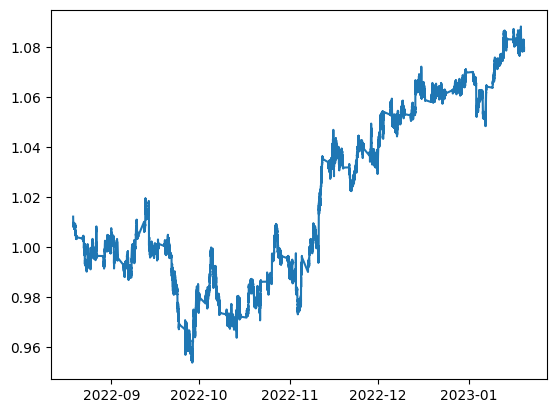

In [10]:
plt.plot(df["time"],df["open"])

AttributeError: unexpected attribute 'plot_width' to figure, similar attributes are outer_width, width or min_width